# Israel cities streets orientation

Heavily based on the [excellent work](https://github.com/gboeing/osmnx-examples/blob/master/notebooks/15-calculate-visualize-edge-bearings.ipynb)
of Geoff Boeing, author of the [OSMnx Python library](https://github.com/gboeing/osmnx).


In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import osmnx as ox

%matplotlib inline

/home/ubuntu/venv/osmnx/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Cities and population (as of 2016) according to Wikipedia
CITIES = [
    ('Jerusalem',     882652),
    ('Tel Aviv',      438818),
    ('Haifa',         279591),
    ('Rishon LeZion', 247323),
    ('Petach Tikva',  236169),
    ('Ashdod',        221591),
    ('Netanya',       210834),
    ('Beer Sheva',    205810),
    ('Holon',         190838),
    ('Bnei Brak',     188964),
    ('Ramat Gan',     153674),
    ('Rehovot',       135726)
]

CITY_NAMES = [r[0] for r in CITIES]

HEBREW_NAMES = [
    'ירושלים',
    'תל אביב יפו',
    'חיפה',
    'ראשון לציון',
    'פתח תקווה',
    'אשדוד',
    'נתניה',
    'באר שבע',
    'חולון',
    'בני ברק',
    'רמת גן',
    'רחובות'
]

In [3]:
def get_bearings(city):
    """Fetch the city's streets map from OpenStreetMap, calculate the bearings, and
    cache the results in a local Pickle file."""
    filename = city.replace(' ', '_') + '.pkl'
    if os.path.isfile(filename):
        print("Getting street bearings for {} from saved local file".format(city))
        with open(filename, 'rb') as f:
            return pickle.load(f)
    print("Getting street bearings for {}".format(city))
    G = ox.graph_from_place('{}, Israel'.format(city), network_type='drive')
    G = ox.add_edge_bearings(G)
    bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
    with open(filename, 'wb') as f:
        pickle.dump(bearings, f, pickle.HIGHEST_PROTOCOL)
    return bearings

## Display the polar plots

Getting street bearings for Jerusalem from saved local file
Getting street bearings for Tel Aviv from saved local file
Getting street bearings for Haifa from saved local file
Getting street bearings for Rishon LeZion from saved local file
Getting street bearings for Petach Tikva from saved local file
Getting street bearings for Ashdod from saved local file
Getting street bearings for Netanya from saved local file
Getting street bearings for Beer Sheva from saved local file
Getting street bearings for Holon from saved local file
Getting street bearings for Bnei Brak from saved local file
Getting street bearings for Ramat Gan from saved local file
Getting street bearings for Rehovot from saved local file


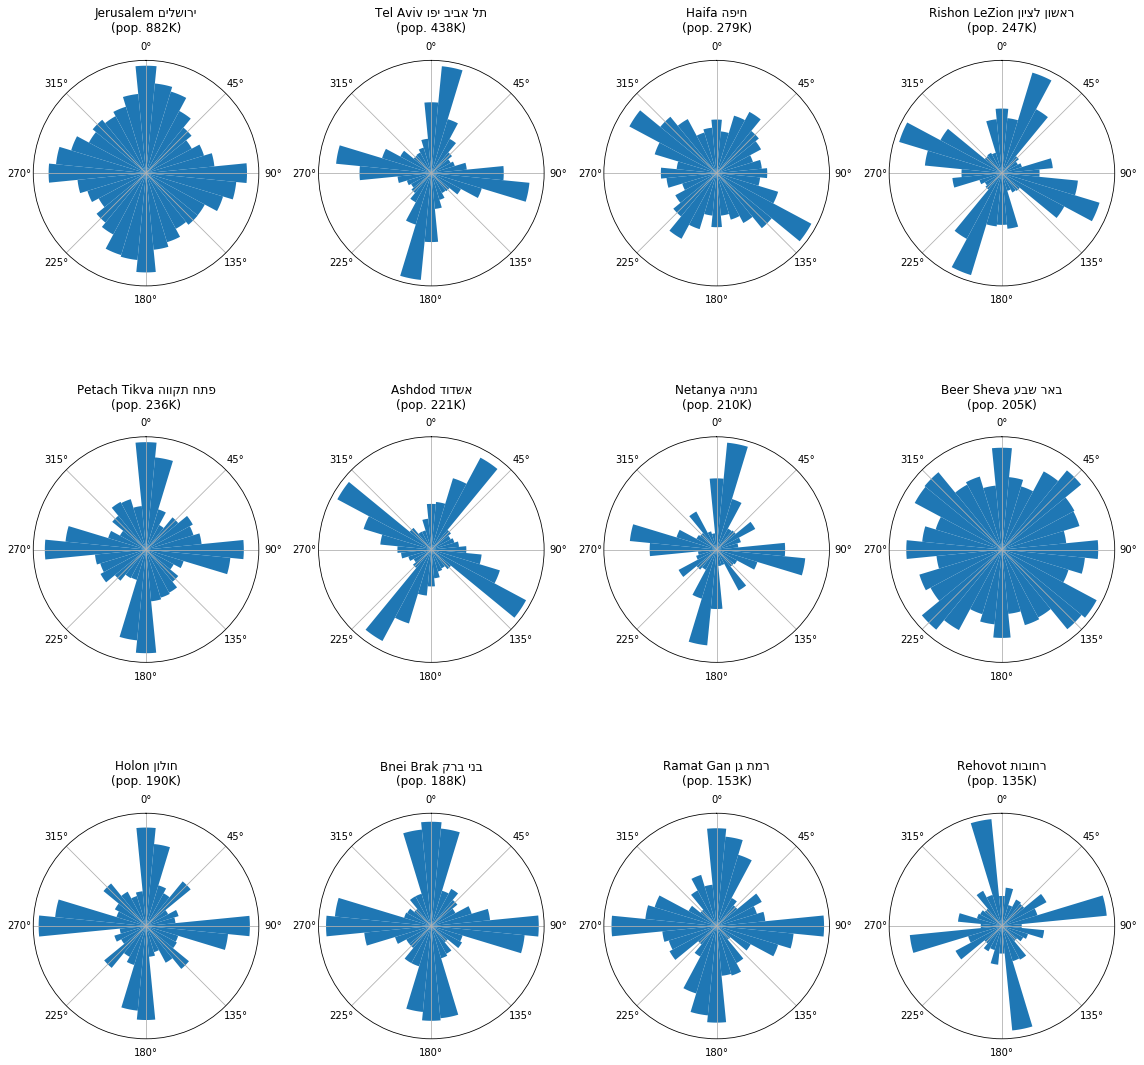

In [4]:
def plot_polar_bearings(subplot_loc, title, bearings):
    n = 32
    bins = np.linspace(0, 360, num=n*2+1)
    count, division = np.histogram(bearings, bins=bins)
    # move the last slide (the one to the left of "North") to be the first
    rotated_count = np.roll(count, 1)
    # sum every pair of adjacent cells
    new_count = np.zeros(n)
    for i in range(0, len(rotated_count), 2):
        new_count[i // 2] = rotated_count[i] + rotated_count[i + 1]
    centers = np.arange(0, 360, 360/n)
    width = 2 * np.pi / n
    ax = plt.subplot(*subplot_loc, projection='polar')
    ax.set_theta_zero_location('N')
    ax.set_theta_direction('clockwise')
    ax.get_yaxis().set_visible(False)
    bars = ax.bar(centers * np.pi / 180.0, new_count, width=width) #, bottom=20.0)
    ax.set_title(title, y=1.1)

def reverse_str(s):
    return s[::-1]

plt.figure(figsize=(16,16))
#fig, axes = plt.subplots(nrows=4, ncols=4)
#fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

# Generate all subplots
for i in range(len(CITIES)):
    name, population = CITIES[i]
    title = "{} {}\n(pop. {}K)".format(name, reverse_str(HEBREW_NAMES[i]), population // 1000)
    plot_polar_bearings((3, 4, i + 1), title, get_bearings(name))

plt.tight_layout()
plt.savefig('israel-cities-street-orientation.png', dpi=300)
plt.show()

In [5]:
# For small experiments:
def plot_one_city(name):
    plot_polar_bearings((1, 1, 1), name, get_bearings(name))

Getting street bearings for Nahalal from saved local file


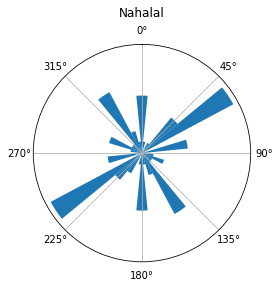

In [6]:
plot_one_city('Nahalal')

Getting street bearings for Dimona from saved local file


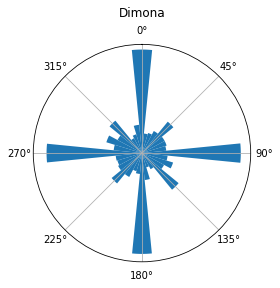

In [7]:
plot_one_city('Dimona')

Getting street bearings for Eilat from saved local file


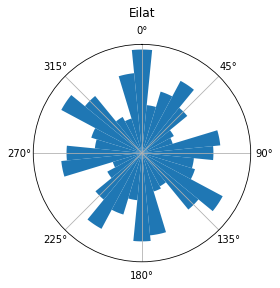

In [8]:
plot_one_city('Eilat')